In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [6]:
tele = pd.read_csv('telecomfinal.csv')
tele.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
print(tele.groupby('churn')['phone number'].count())

churn
False    2850
True      483
Name: phone number, dtype: int64


In [8]:
drp = tele[['state','area code','phone number','international plan','voice mail plan','churn']]
X= tele.drop(drp,1)
y= tele.churn
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)


In [9]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Logistic regression score =',round(metrics.accuracy_score(y_test, y_pred),2))

Logistic regression score = 0.86


In [10]:
scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy') 
print('Logistic regression of each partition\n',scores)
print(' score of all the scores after cross validation =',round(scores.mean(),2)) 


Logistic regression of each partition
 [0.85607196 0.85907046 0.85457271 0.85135135 0.85885886]
 score of all the scores after cross validation = 0.86


Text(33,0.5,'Actual')

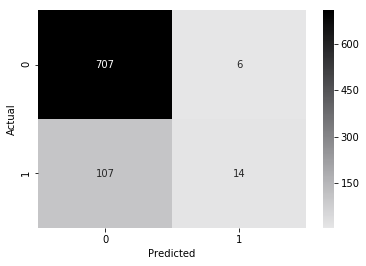

In [11]:
conf = (metrics.confusion_matrix(y_test, y_pred))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [13]:
FP = conf[1][0]
FN = conf[0][1]
TP = conf[0][0]
TN = conf[1][1]
print('False Positive ',FP)
print('False Negative ',FN)
print('True Positive ',TP)
print('True Negative ',TN)
TPR = TP/(TP+FN)
print('\nTrue Positive Rate :',round(TPR,2))
#  true negative rate
TNR = TN/(TN+FP) 
print('\nTrue Negative Rate :',round(TNR,2))
# positive predictive value
PPV = TP/(TP+FP)
print('\nPositive Predictive Value :',round(PPV,2))
# Negative predictive value
NPV = TN/(TN+FN)
print('\nNegative Predictive Value :',round(NPV,2))
# Fall out or false positive rate
FPR = FP/(FP+TN)
print('\nFalse Positive Rate :',round(FPR,2))
#  False negative rate
FNR = FN/(TP+FN)
print('\nFalse Negative Rate :',round(FNR,2))
# False discovery rate
FDR = FP/(TP+FP)
print('\nFalse Discovery Rate :',round(FDR,2))

# accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('\nOverall accuracy :',round(ACC,2))



False Positive  107
False Negative  6
True Positive  707
True Negative  14

True Positive Rate : 0.99

True Negative Rate : 0.12

Positive Predictive Value : 0.87

Negative Predictive Value : 0.7

False Positive Rate : 0.88

False Negative Rate : 0.01

False Discovery Rate : 0.13

Overall accuracy : 0.86


In [14]:
rf_clf = RandomForestClassifier(n_estimators=120, criterion='entropy')
rf_clf.fit(X_train, y_train)
rf_pred_test = rf_clf.predict(X_test)
print('Accuracy of Random forest :',round(metrics.accuracy_score(y_test, rf_pred_test),2))

Accuracy of Random forest : 0.92


Text(33,0.5,'Actual')

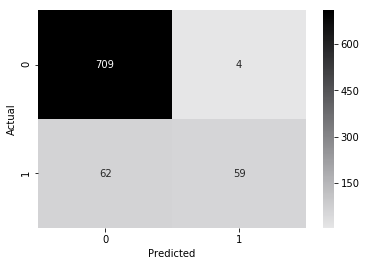

In [15]:
rf_conf = (metrics.confusion_matrix(y_test, rf_pred_test))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(rf_conf,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [16]:
FP = rf_conf[1][0]
FN = rf_conf[0][1]
TP = rf_conf[0][0]
TN = rf_conf[1][1]
print('False Positive ',FP)
print('False Negative ',FN)
print('True Positive ',TP)
print('True Negative ',TN)
TPR = TP/(TP+FN)
print('\nTrue Positive Rate :',round(TPR,2))
# true negative rate
TNR = TN/(TN+FP) 
print('\nTrue Negative Rate :',round(TNR,2))
#  positive predictive value
PPV = TP/(TP+FP)
print('\nPositive Predictive Value :',round(PPV,2))
# Negative predictive value
NPV = TN/(TN+FN)
print('\nNegative Predictive Value :',round(NPV,2))
#  false positive rate
FPR = FP/(FP+TN)
print('\nFalse Positive Rate :',round(FPR,2))
# False negative rate
FNR = FN/(TP+FN)
print('\nFalse Negative Rate :',round(FNR,2))
# False discovery rate
FDR = FP/(TP+FP)
print('\nFalse Discovery Rate :',round(FDR,2))

#  accuracy
AC = (TP+TN)/(TP+FP+FN+TN)
print('\nOverall accuracy :',round(AC,2))

False Positive  62
False Negative  4
True Positive  709
True Negative  59

True Positive Rate : 0.99

True Negative Rate : 0.49

Positive Predictive Value : 0.92

Negative Predictive Value : 0.94

False Positive Rate : 0.51

False Negative Rate : 0.01

False Discovery Rate : 0.08

Overall accuracy : 0.92
